In [1]:
# import module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try:
    data = pd.read_csv('E:\\terrorist.csv')
except:
    print("file not found...")
data.columns

Index(['iyear', 'imonth', 'iday', 'country_txt', 'city', 'attacktype1_txt',
       'targtype1_txt', 'corp1', 'target1', 'natlty1_txt', 'gname',
       'weaptype1_txt', 'weapsubtype1_txt', 'weapdetail', 'nkill', 'nwound',
       'propextent_txt', 'ransomamt'],
      dtype='object')

In [3]:
data.rename({'iyear':'year','imonth':'month','iday':'day','country_txt':'country','attacktype1_txt':'attack',\
             'targtype1_txt':'target', 'corp1':'target_inst', 'target1':'target_pop', 'natlty1_txt':'nationality',\
             'gname':'group','weaptype1_txt':'weapon_type', 'weapsubtype1_txt':'weapon_subtype', 'nkill':'kill', \
             'nwound':'wound','propextent_txt':'property_damg', 'ransomamt':'ransom'},axis='columns',inplace=True)
data.head(1)

,year,month,day,country,city,attack,target,target_inst,target_pop,nationality,group,weapon_type,weapon_subtype,weapdetail,kill,wound,property_damg,ransom
0,2012,1,1,Kenya,Garissa,Armed Assault,Business,Locus Pub,Bar,Kenya,Al-Shabaab,Explosives/Bombs/Dynamite,Grenade,Two grenades and AK-47 assault rifles were use...,3.0,14.0,Minor (likely < $1 million),NaN


In [4]:
data.describe()

,year,month,day,kill,wound,ransom
count,43915.000000,43915.000000,43915.000000,41290.000000,39313.000000,2.730000e+02
mean,2014.688079,6.442537,15.664716,3.110463,3.504006,4.066460e+06
std,1.229350,3.390650,8.778536,13.343306,13.988988,2.180638e+07
min,2012.000000,1.000000,1.000000,0.000000,0.000000,-9.900000e+01
25%,2014.000000,4.000000,8.000000,0.000000,0.000000,-9.900000e+01
50%,2015.000000,6.000000,15.000000,1.000000,0.000000,1.586045e+04
75%,2016.000000,9.000000,23.000000,2.000000,3.000000,2.189562e+05
max,2016.000000,12.000000,31.000000,1500.000000,1500.000000,2.000000e+08


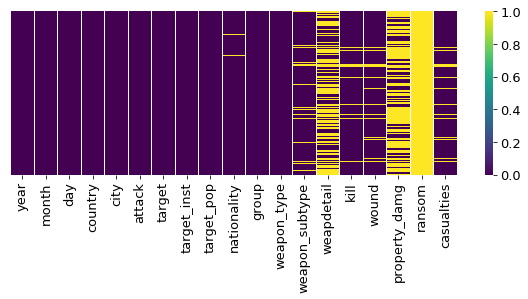

In [16]:
plt.figure(figsize=(10,3))
plt.rcParams['ytick.labelsize']=13
plt.rcParams['xtick.labelsize']=13
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [6]:
p=data[data.country=='India']
p.kill.describe()

count    3155.000000
mean        0.598732
std         1.744454
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        42.000000
Name: kill, dtype: float64

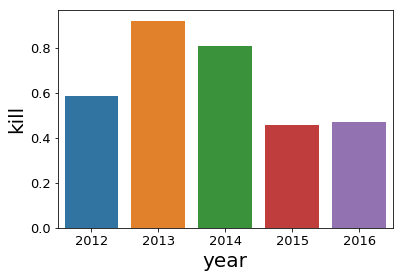

In [17]:
sns.barplot(p.year,p.kill,ci=None)
plt.rcParams['axes.labelsize']=15
plt.show()

In [8]:
data["casualties"]=data["kill"]+data["wound"]

In [9]:
data.head(1)

,year,month,day,country,city,attack,target,target_inst,target_pop,nationality,group,weapon_type,weapon_subtype,weapdetail,kill,wound,property_damg,ransom,casualties
0,2012,1,1,Kenya,Garissa,Armed Assault,Business,Locus Pub,Bar,Kenya,Al-Shabaab,Explosives/Bombs/Dynamite,Grenade,Two grenades and AK-47 assault rifles were use...,3.0,14.0,Minor (likely < $1 million),NaN,17.0


In [10]:
data.corr() #strong relation b/w casualties and 1.wound,2.kill.. wound and casualties

,year,month,day,kill,wound,ransom,casualties
year,1.000000,-0.032845,-0.002996,-0.019340,-0.025865,-0.165084,-0.027597
month,-0.032845,1.000000,0.002112,0.005468,-0.001070,0.077339,0.003335
day,-0.002996,0.002112,1.000000,-0.008516,-0.001725,0.041875,-0.001706
kill,-0.019340,0.005468,-0.008516,1.000000,0.364357,0.029284,0.718234
wound,-0.025865,-0.001070,-0.001725,0.364357,1.000000,-0.038720,0.909665
ransom,-0.165084,0.077339,0.041875,0.029284,-0.038720,1.000000,0.019981
casualties,-0.027597,0.003335,-0.001706,0.718234,0.909665,0.019981,1.000000


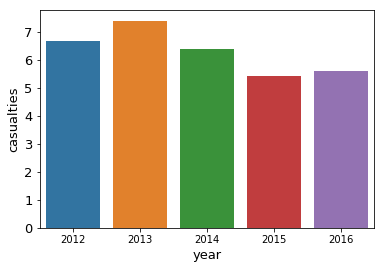

In [11]:
sns.barplot(data=data,x='year',y='casualties',ci=None) #ci=None-no error bars,no bootstrapping
                                                         #=sd-skip bootstrapping,draw std-dev of observs.
                                                         #=(float)-size of confidence intervals to draw around estimated values

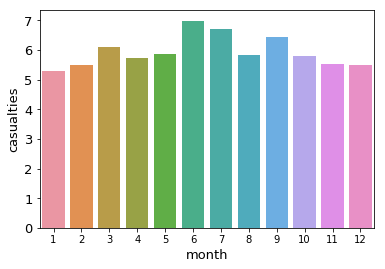

In [12]:
sns.barplot(data=data,x='month',y='casualties',ci=None)

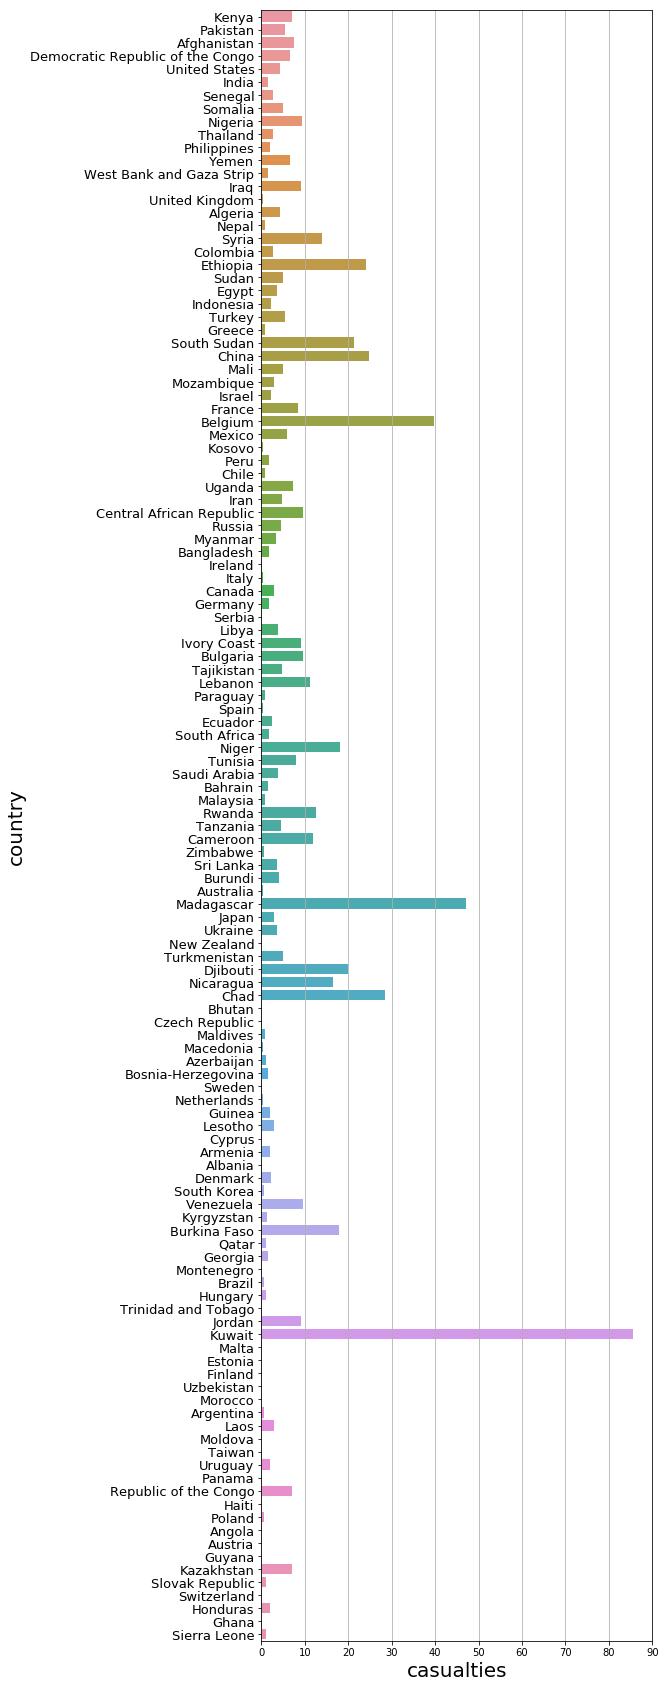

In [13]:
plt.figure(figsize=(7,30))
plt.rcParams['axes.labelsize']=20
plt.grid(True)
sns.barplot(data=data,y='country',x='casualties',ci=None)

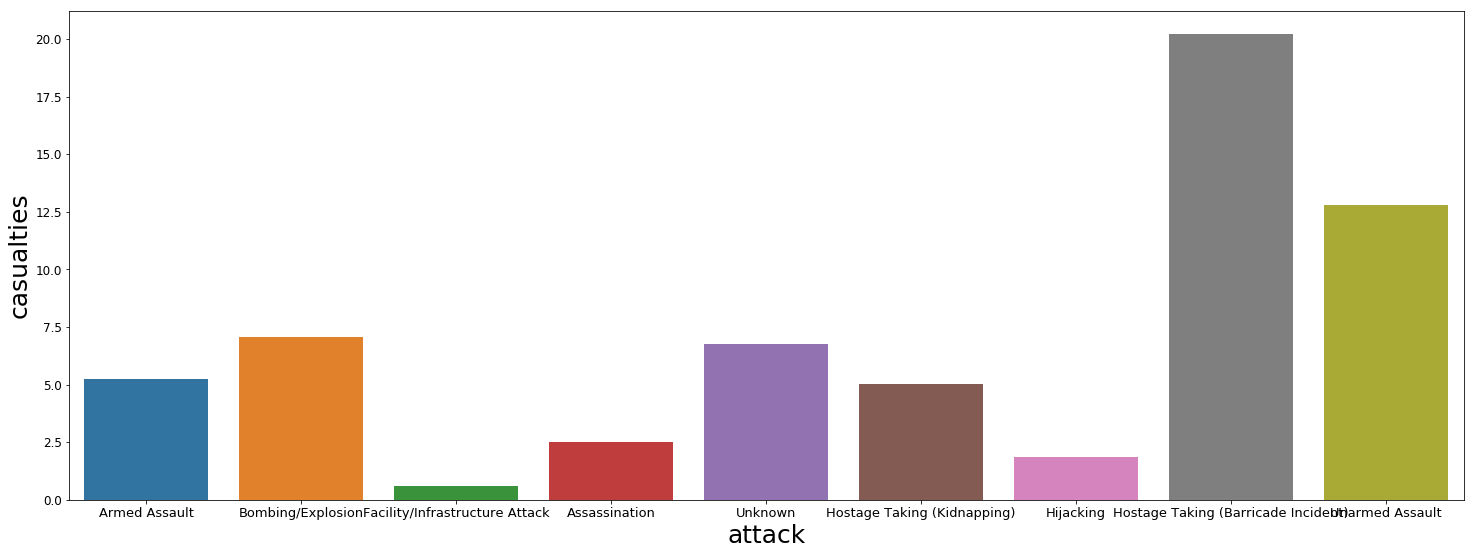

In [22]:
plt.figure(figsize=(25,9))
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.rcParams['axes.labelsize']=25
sns.barplot(data=data,x='attack',y='casualties',ci=None)

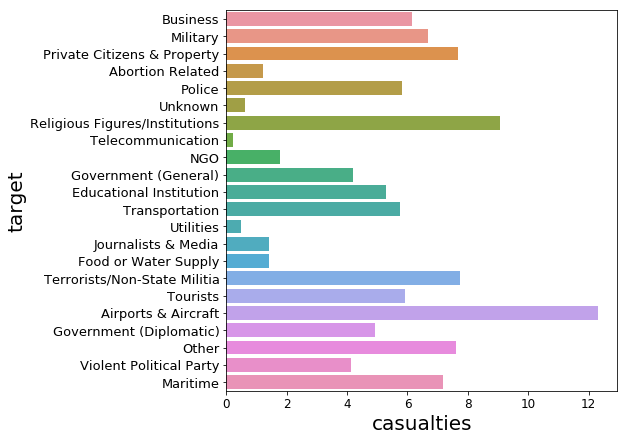

In [15]:
plt.figure(figsize=(7,7))
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=13
plt.rcParams['axes.labelsize']=20
sns.barplot(data=data,y='target',x='casualties',ci=None)